In [1]:
import pandas as pd
import numpy as np
rundf = pd.read_csv('results/SIsaR_0.9.4.1 experiments 2 seeds with control-table.csv',
                    sep=',',skiprows=6)

In [2]:
rundf["totalInfected"]=rundf["cumulativeRedCount"]+rundf["cumulativeVioletCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]
rundf["totalInfected&Deceased"]=rundf["totalInfected"]+rundf["cumulativeDeadCount"]

In [3]:
rundf.columns

Index(['[run number]', '[step]', 'seed0', 'seed', 'cp1cRed', 'cp1cRedNH',
       'cp1cViolet', 'cp1cVioletNH', 'cp1cDead', 'cp2cRed', 'cp2cRedNH',
       'cp2cViolet', 'cp2cVioletNH', 'cp2cDead', 'cp3cRed', 'cp3cRedNH',
       'cp3cViolet', 'cp3cVioletNH', 'cp3cDead', 'cp4cRed', 'cp4cRedNH',
       'cp4cViolet', 'cp4cVioletNH', 'cp4cDead', 'cumulativeRedCount',
       'cumulativeVioletCount', 'cumulativeDeadCount', 'ticks', 'TinfSch',
       'SinfSch', 'TinfNotSch', 'SinfNotSch', 'totalInfected',
       'totalInfected&Deceased'],
      dtype='object')

In [4]:
rundf.replace(-1, np.nan, inplace=True)

In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1000 runs with containment measures, no school in Sep

In [6]:
rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

,cp1cRedNH,cumulativeRedCount,totalInfected&Deceased,ticks
count,946.00,1000.00,1000.00,1000.00
mean,4.51,158.55,416.98,196.97
std,7.39,174.10,462.94,131.18
min,0.00,0.00,2.00,12.00
25%,0.00,9.75,20.00,89.75
50%,0.00,82.00,219.00,154.00
75%,8.00,287.00,778.75,298.00
max,46.00,749.00,1916.00,611.00


In [7]:
tmp=rundf[['cp1cRedNH','cumulativeRedCount','totalInfected&Deceased','ticks']].describe()

In [8]:
print (tmp.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cp1cRedNH &  cumulativeRedCount &  totalInfected\&Deceased &   ticks \\
\midrule
count &     946.00 &             1000.00 &                 1000.00 & 1000.00 \\
mean  &       4.51 &              158.55 &                  416.98 &  196.97 \\
std   &       7.39 &              174.10 &                  462.94 &  131.18 \\
min   &       0.00 &                0.00 &                    2.00 &   12.00 \\
25\%   &       0.00 &                9.75 &                   20.00 &   89.75 \\
50\%   &       0.00 &               82.00 &                  219.00 &  154.00 \\
75\%   &       8.00 &              287.00 &                  778.75 &  298.00 \\
max   &      46.00 &              749.00 &                 1916.00 &  611.00 \\
\bottomrule
\end{tabular}



The output is included within:  
\begin{table}[htbp] or [H]

... output above ...

\label{a label}  
\caption{a caption}  
\end{table}


## 1 simulation time

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc35d143970>]],
      dtype=object)

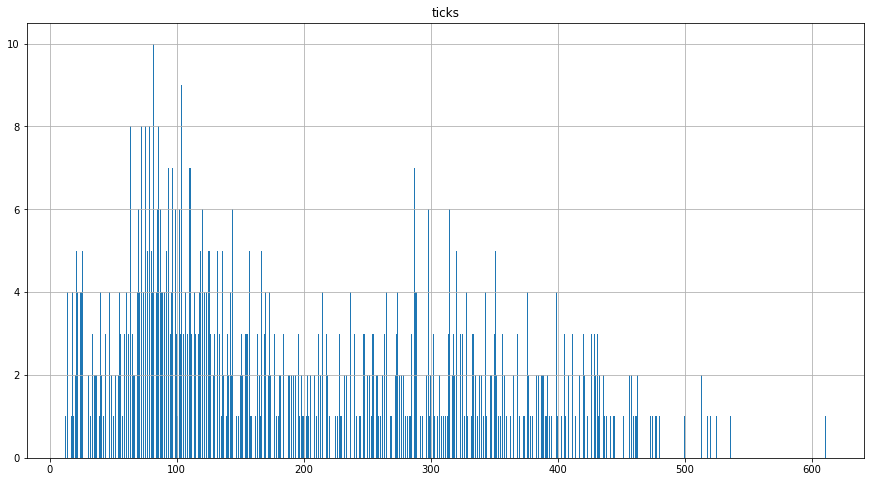

In [9]:
rundf.hist(column="ticks",bins=1000,figsize=(15,8))

## 2 symptomatic agent cumulative count

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc35dc8a190>]],
      dtype=object)

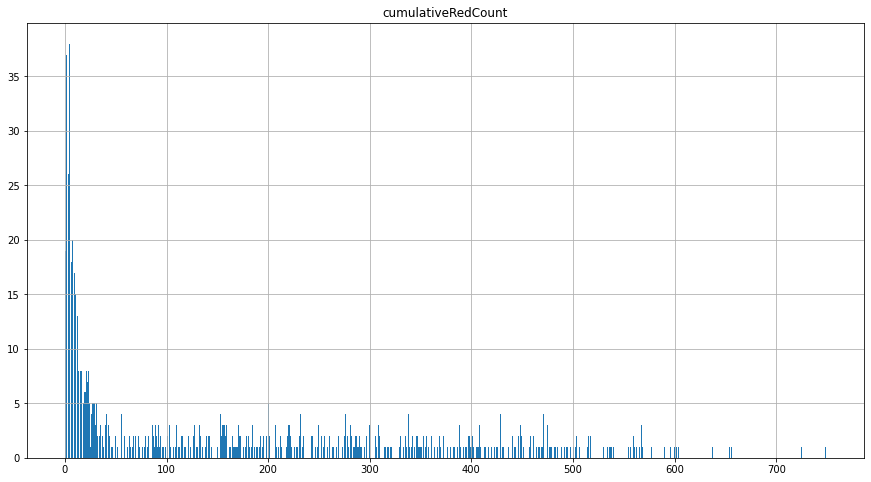

In [10]:
rundf.hist(column="cumulativeRedCount",bins=1000,figsize=(15,8))

## 3 symptomatic agent cumulative count vs. time 

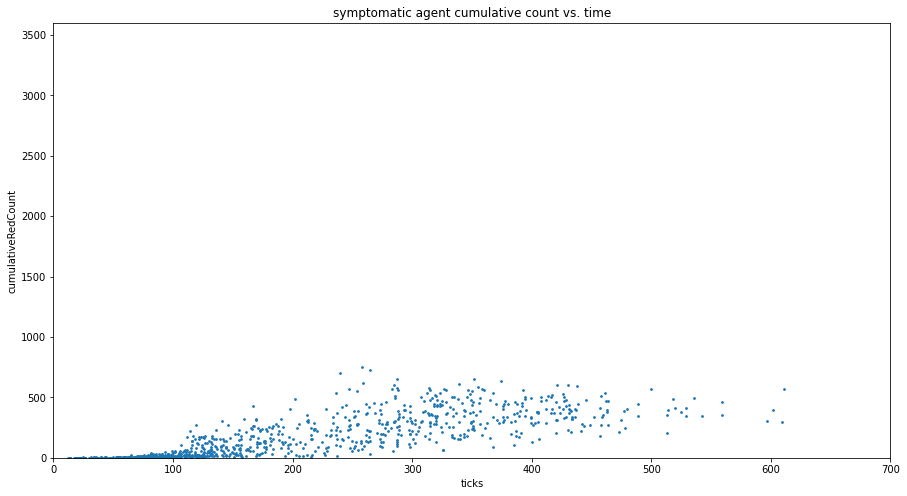

In [11]:
rundf.plot(x="ticks",y="cumulativeRedCount",s=3,kind='scatter',figsize=(15,8), 
           title="symptomatic agent cumulative count vs. time",
           ylim=(0,3600),xlim=(0,700))

## 4 symptomatic + asymptomatic agent cumulative count

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc35dfff700>]],
      dtype=object)

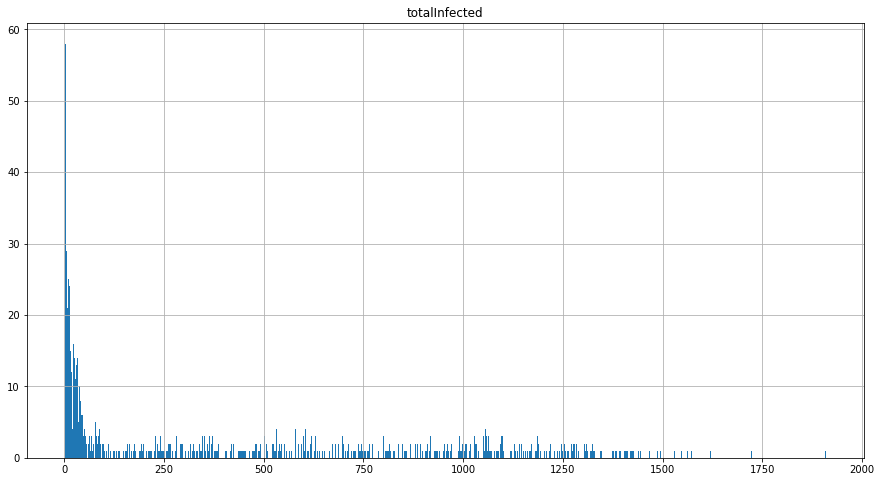

In [12]:
rundf.hist(column="totalInfected",bins=1000,figsize=(15,8))

## 5 total number of deceased

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc35f7fd520>]],
      dtype=object)

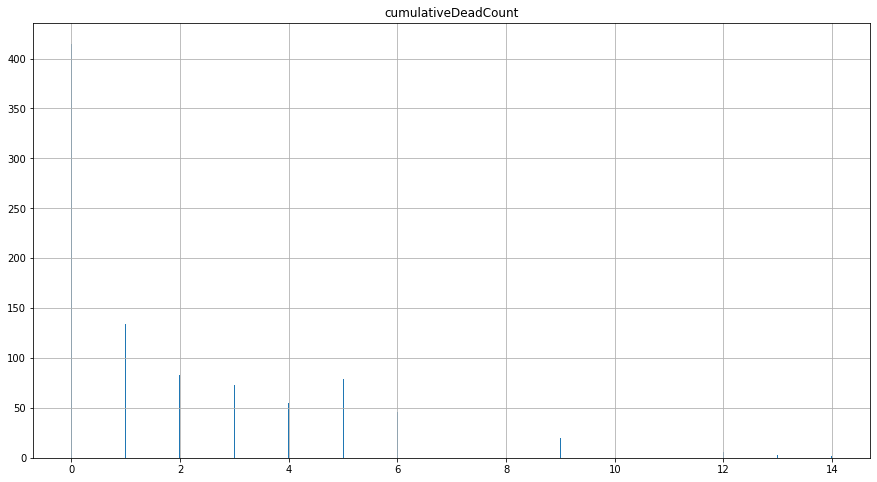

In [13]:
rundf.hist(column="cumulativeDeadCount",bins=1000,figsize=(15,8))

## 6 symptomatic + asymptomatic + deceased agent cumulative count

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc35f790df0>]],
      dtype=object)

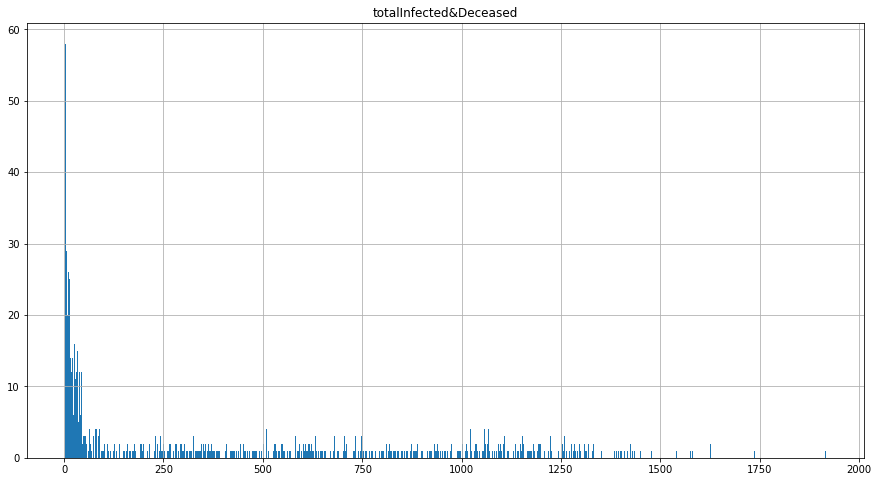

In [14]:
rundf.hist(column="totalInfected&Deceased",bins=1000,figsize=(15,8))

## 7 symptomatic + asymptomatic + deceased agent cumulative count vs. time

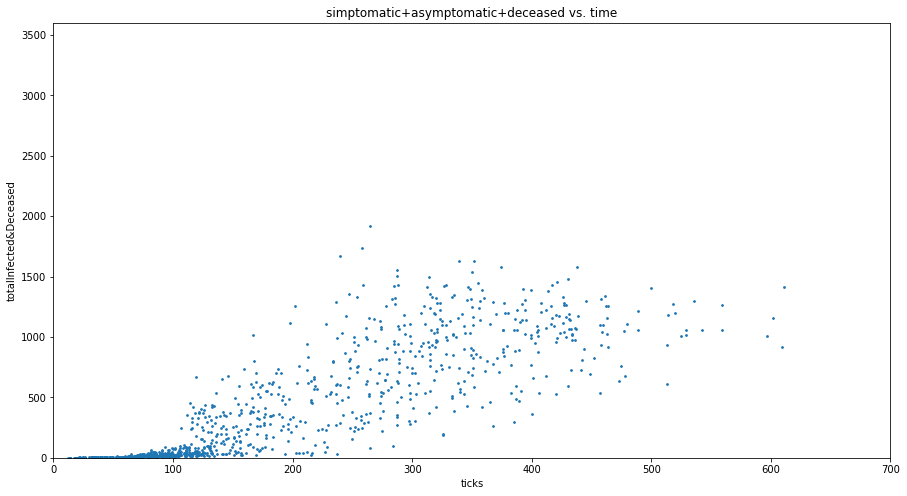

In [15]:
rundf.plot(x="ticks",y="totalInfected&Deceased",s=3,kind='scatter',figsize=(15,8), 
           title="simptomatic+asymptomatic+deceased vs. time",ylim=(0,3600),xlim=(0,700))

# Heatmaps

In [16]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

#import numpy as np
import seaborn as sns; sns.set()

### bins = 10

### symptomatic + asymptomatic + deceases

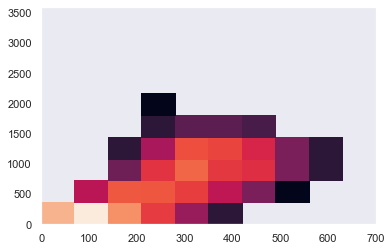

In [17]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [18]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=10,
                  range=[[0, 700], [0, 3600]]);

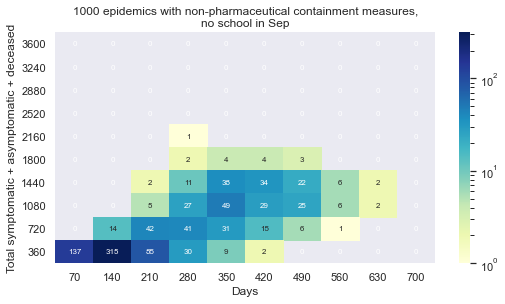

In [19]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\nno school in Sep')

plt.show()

### bins = 20

### symptomatic + asymptomatic + deceases

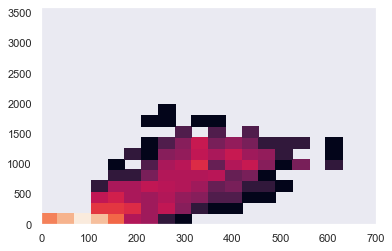

In [20]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [21]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=20,
                  range=[[0, 700], [0, 3600]])

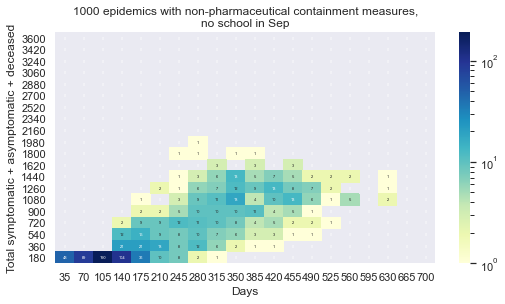

In [22]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":4}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\nno school in Sep')

plt.show()

### bins = 30

### symptomatic + asymptomatic + deceases

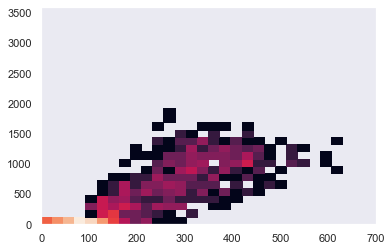

In [23]:
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [24]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

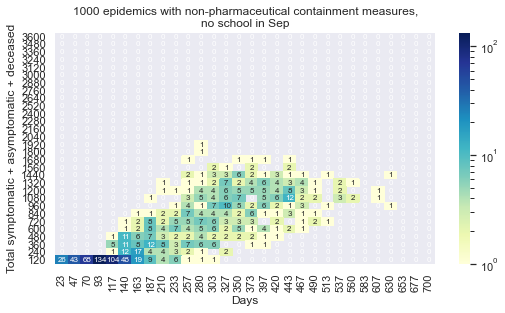

In [25]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f',
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\nno school in Sep')

plt.show()

### bins = 60

### symptomatic + asymptomatic + deceases

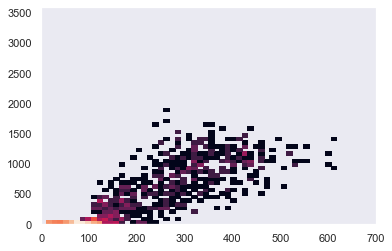

In [26]:
histLog = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]],norm=LogNorm())

In [27]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=60,
                  range=[[0, 700], [0, 3600]])

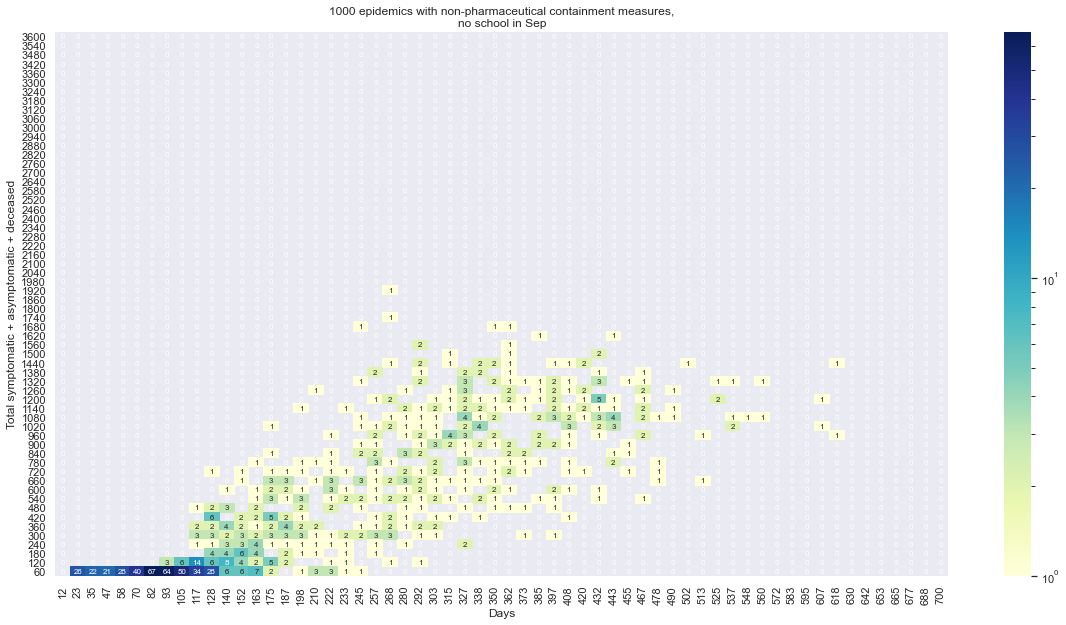

In [28]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f', 
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\nno school in Sep')

plt.show()

In [36]:
rundf[['ticks','totalInfected&Deceased']].to_csv('readRunResults1k_withControl_plusHMlog.csv',
                                              index=False)